In [ ]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import imageio
import PIL
import os
%matplotlib inline

In [ ]:
dl_info = pd.read_csv('DL_info.csv')
dl_info['Directory_name'] = [
    name[:name.rindex('_')] for name in dl_info['File_name']]
filter = dl_info['Coarse_lesion_type'] == 6
kidney_info = dl_info.where(filter).dropna()

In [ ]:
file_name = "002536_01_02_246-369.nii.gz" ## change this for different file
segmentation_file_name = f"DL_{file_name}"
dir_name = file_name[0:file_name.rfind('_')]

In [ ]:
file_name = "002569_01_01_078-092.nii.gz" ## change this for different file
segmentation_file_name = f"DL_{file_name}"
dir_name = file_name[0:file_name.rfind('_')]

In [ ]:
volume = nib.load(file_name)

In [ ]:
print(type(volume), volume.shape)

<class 'nibabel.nifti1.Nifti1Image'> (512, 512, 15)


In [ ]:
volume.affine

array([[ 0.      , -0.859375,  0.      ,  0.      ],
       [-0.859375,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      , -5.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  1.      ]])

In [ ]:
volume.header.get_zooms()

(0.859375, 0.859375, 5.0)

In [ ]:
volume.header.get_xyzt_units()

('unknown', 'unknown')

In [ ]:
volume_data = volume.get_fdata()

In [ ]:
volume_data = volume_data - 32768

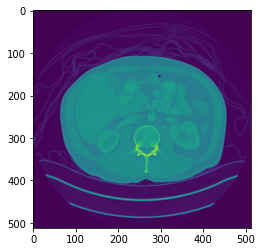

In [ ]:
plt.imshow(volume_data[:,:,5])

In [ ]:
kidney_info.head()

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test,Directory_name
39,000010_01_01_084.png,10.0,1.0,1.0,84.0,"185.331, 263.592, 111.742, 300.387, 136.272, 2...","106.742, 252.752, 190.331, 324.66","82.2749, 65.1956","0.27783, 0.560342, 0.715933",6.0,0.0,"78, 90","0.772, 0.772, 5","512, 512","-160, 240",F,42.0,2.0,000010_01_01
57,000016_01_01_030.png,16.0,1.0,1.0,30.0,"360, 359.111, 331.556, 345.778, 350.222, 344, ...","326.556, 339, 365, 364.111","31.4144, 15.5238","0.682724, 0.63216, 0.687355",6.0,0.0,"19, 36","0.703125, 0.703125, 5","512, 512","-175, 275",F,54.0,3.0,000016_01_01
58,000016_01_01_030.png,16.0,1.0,1.0,30.0,"146.667, 307.556, 104.889, 339.556, 131.556, 3...","99.8889, 302.556, 151.667, 355.222","52.6249, 48.9535","0.221222, 0.586175, 0.687355",6.0,0.0,"19, 36","0.703125, 0.703125, 5","512, 512","-175, 275",F,54.0,3.0,000016_01_01
59,000016_01_01_025.png,16.0,1.0,1.0,25.0,"172.444, 358.222, 125.333, 340.444, 144.889, 3...","120.333, 331, 177.444, 370.333","50.3538, 31.5274","0.254966, 0.628073, 0.670661",6.0,0.0,"19, 36","0.703125, 0.703125, 5","512, 512","-175, 275",F,54.0,3.0,000016_01_01
61,000016_02_01_333.png,16.0,2.0,1.0,333.0,"169.492, 319.492, 217.905, 309.968, 198.063, 3...","164.492, 297.032, 222.905, 340.365","49.3406, 33.5687","0.312755, 0.591118, 0.648328",6.0,0.0,"303, 388","0.82, 0.82, 1","512, 512","-175, 275",F,59.0,3.0,000016_02_01


In [ ]:
scan_info = kidney_info.where(dl_info['Directory_name'] == dir_name).dropna()
scan_info

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test,Directory_name
21822,002569_01_01_086.png,2569.0,1.0,1.0,86.0,"393.262, 303.439, 383.152, 313.938, 385.097, 3...","378.152, 298.439, 398.262, 319.327","14.5752, 10.506","0.8147, 0.664558, 0.661178",6.0,0.0,"78, 92","0.859375, 0.859375, 5","512, 512","-175, 275",M,55.0,3.0,002569_01_01
21823,002569_01_01_084.png,2569.0,1.0,1.0,84.0,"149.845, 292.163, 142.846, 306.161, 140.513, 2...","135.513, 287.163, 155.623, 311.161","15.6507, 13.2436","0.202818, 0.636451, 0.662897",6.0,0.0,"78, 92","0.859375, 0.859375, 5","512, 512","-175, 275",M,55.0,3.0,002569_01_01


In [ ]:
def get_scan_info(df, dir_name):
  scan_info = kidney_info.where(dl_info['Directory_name'] == dir_name).dropna()
  return scan_info

In [ ]:
def visualise_slice(volume, segmentation, scan_df, slice_idx):
    fig, ax = plt.subplots(1, 3, figsize=(30, 10))
    plt.close()

    ax[0].set_title('Scan')
    ax[0].imshow(volume_data[:, :, slice_idx], cmap='gray')
    
    ax[1].set_title('Bounding box')
    ax[1].imshow(volume_data[:, :, slice_idx], cmap='gray')
    for box in scan_df["Bounding_boxes"]:
      box = [float(coord) for coord in box.split(',')]
      x = [box[0], box[2], box[2], box[0], box[0]]
      y = [box[1], box[1], box[3], box[3], box[1]]
      ax[1].plot(x, y, 'r')

    ax[2].set_title('nnU-net segmentation')
    ax[2].imshow(segmentation[slice_idx, :, :], cmap='hot')

    fig.canvas.draw()

    return fig

In [ ]:
def frame_from_slice(volume, segmentation, scan_df, slice_idx):
  fig = visualise_slice(volume, segmentation, scan_df, slice_idx)
  return PIL.Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())

In [ ]:
segmentation = nib.load(segmentation_file_name).get_fdata()
segmentation.shape

(15, 512, 512)

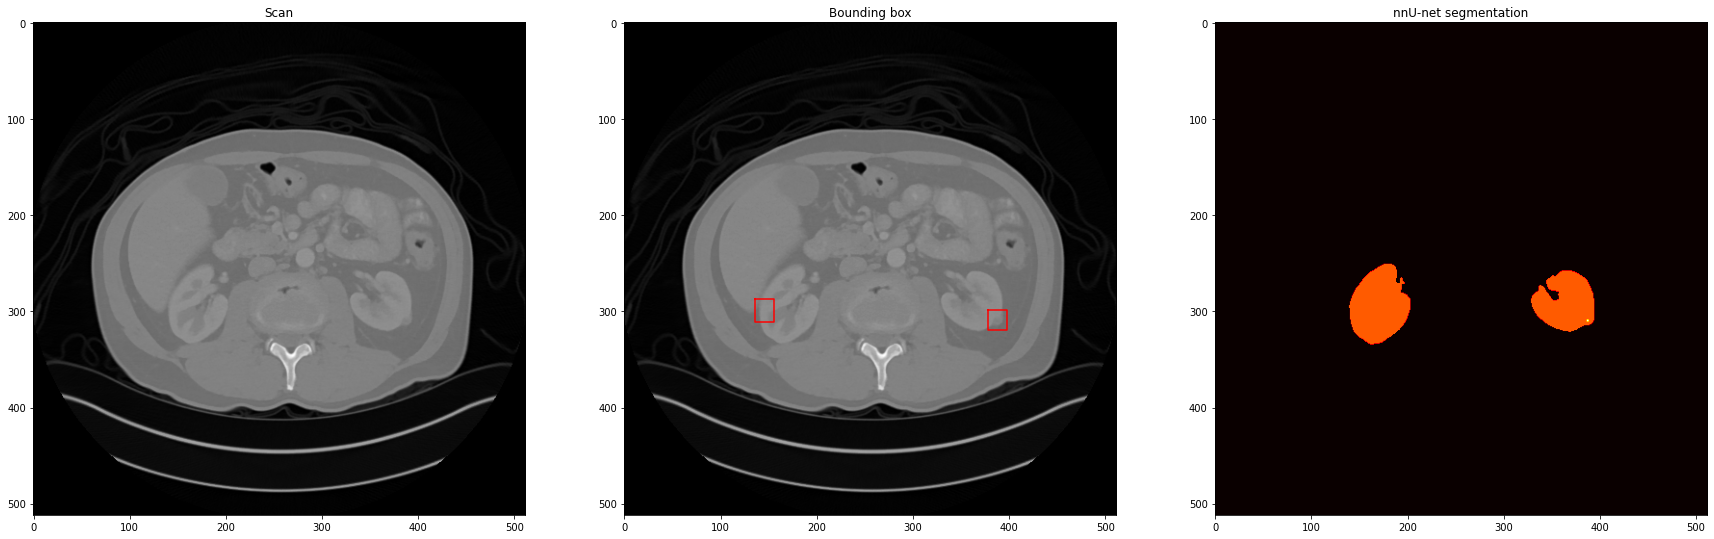

In [ ]:
visualise_slice(volume_data, segmentation, scan_info, 8)

In [ ]:
def make_gif(volume, segmentation, scan_info, filename):
  frames = []

  method = PIL.Image.FASTOCTREE
  colors = 250


  for i in range(volume.shape[2]):
    frame = frame_from_slice(volume, segmentation, scan_info, i)
    gif_frame = frame.quantize(colors=colors, method=method, dither=0)
    frames.append(gif_frame)

  frames[0].save(
    f'{filename}.gif',
    format="GIF",
    append_images=frames[1:],
    save_all="true",
    duration=200,
    loop=0,
    quality=100)

In [ ]:
make_gif(volume, segmentation, get_scan_info(kidney_info, dir_name), dir_name)

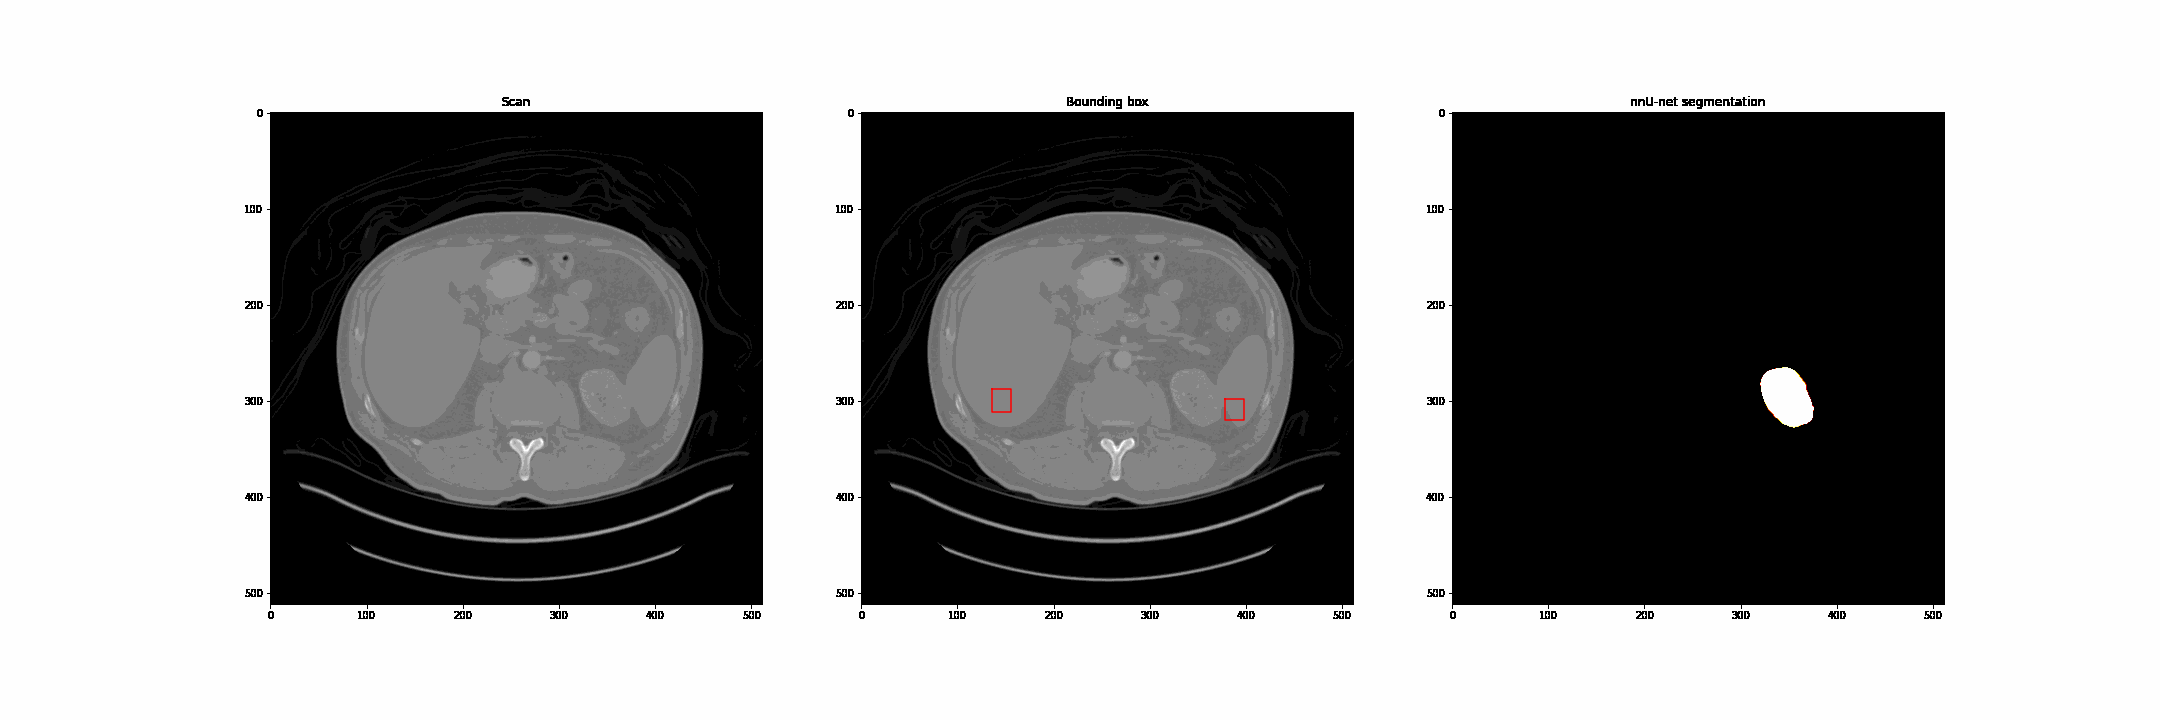

In [ ]:
from IPython.display import Image
Image(f"{dir_name}.gif")